<a href="https://colab.research.google.com/github/HdemonKhaim/Python_Homeworks/blob/main/ABT12ignatenkov6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
gett_df = pd.read_csv('post_abtest_data.csv')
gett_df.head()

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups
0,867689,2020-05-28,1,Control,1,1,no surge,Android,0.0,1.0,Control
1,867689,2020-05-29,1,Control,1,0,surge,iOS,NaN,NaN,Control
2,867689,2020-05-25,1,Control,1,1,surge,Android,0.0,0.0,Control
3,752172,2020-05-29,1,Control,1,1,surge,Android,0.0,1.0,Control
4,752172,2020-05-28,1,Control,1,1,no surge,iOS,0.0,0.0,Control


In [17]:
print(gett_df.shape) 
gett_df.info()

(101500, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101500 entries, 0 to 101499
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            101500 non-null  int64  
 1   date               101500 non-null  object 
 2   app_opened         101500 non-null  int64  
 3   group              101500 non-null  object 
 4   price_seen         101500 non-null  int64  
 5   order_made         101500 non-null  int64  
 6   surge              92358 non-null   object 
 7   os                 101500 non-null  object 
 8   user_cancelled     70157 non-null   float64
 9   city_center_order  70157 non-null   float64
 10  groups             101500 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.5+ MB


In [18]:
gett_df['surge'] = gett_df['surge'].fillna('no surge')# заменяем NaN на 'no surge'
gett_df['user_cancelled'] = gett_df['user_cancelled'].fillna('0')# заменяем NaN на '0' 
gett_df['city_center_order'] = gett_df['city_center_order'].fillna('0')
gett_df = gett_df.astype({'user_cancelled': np.int}) #меняем тип данных user_cancelled на числовой
gett_df = gett_df.astype({'city_center_order': np.int}) #меняем тип данных city_center_order на числовой
gett_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101500 entries, 0 to 101499
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_id            101500 non-null  int64 
 1   date               101500 non-null  object
 2   app_opened         101500 non-null  int64 
 3   group              101500 non-null  object
 4   price_seen         101500 non-null  int64 
 5   order_made         101500 non-null  int64 
 6   surge              101500 non-null  object
 7   os                 101500 non-null  object
 8   user_cancelled     101500 non-null  int64 
 9   city_center_order  101500 non-null  int64 
 10  groups             101500 non-null  object
dtypes: int64(6), object(5)
memory usage: 8.5+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

In [19]:
gett_df.head()

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups
0,867689,2020-05-28,1,Control,1,1,no surge,Android,0,1,Control
1,867689,2020-05-29,1,Control,1,0,surge,iOS,0,0,Control
2,867689,2020-05-25,1,Control,1,1,surge,Android,0,0,Control
3,752172,2020-05-29,1,Control,1,1,surge,Android,0,1,Control
4,752172,2020-05-28,1,Control,1,1,no surge,iOS,0,0,Control


**Фича**

---

Если юзер Android нажимает “отменить”, предлагать промокод в случае НЕ отмены
Ожидаем: ниже отмены на Android устройствах

In [20]:
gett_df_android = gett_df[gett_df.os=='Android'] #сформируем ГС из пользователей с ОС Android
gett_df_android.os.value_counts()

Android    60825
Name: os, dtype: int64

In [21]:
gett_df_android.groups.value_counts()

Control    30453
Test       30372
Name: groups, dtype: int64

In [22]:
gett_df_groupA = gett_df_android[gett_df_android.groups=='Control'] #отфильтруем groups==Control выборка А
gett_df_groupB = gett_df_android[gett_df_android.groups=='Test'] #отфильтруем groups==Test выборка B
 # выбираем нужное количество строк, чтоб выборки А и В были одинаковыми 
gett_df_groupB = gett_df_groupB.iloc[0:30372]
gett_df_groupA = gett_df_groupA.iloc[0:30372]
print(gett_df_groupA.groups.value_counts())
print(gett_df_groupB.groups.value_counts())

Control    30372
Name: groups, dtype: int64
Test    30372
Name: groups, dtype: int64


In [23]:
#Разбиваем тестовую выборку на 7 равных частей
gett_df_groupB1 = gett_df_groupB.iloc[0:4338]
gett_df_groupB2 = gett_df_groupB.iloc[4339:8677]
gett_df_groupB3 = gett_df_groupB.iloc[8678:13016]
gett_df_groupB4 = gett_df_groupB.iloc[13017:17355]
gett_df_groupB5 = gett_df_groupB.iloc[17356:21694]
gett_df_groupB6 = gett_df_groupB.iloc[21695:26033]
gett_df_groupB7 = gett_df_groupB.iloc[26034:30372]
gett_df_groupA1 = gett_df_groupA.iloc[0:4338]
gett_df_groupA2 = gett_df_groupA.iloc[4339:8677]
gett_df_groupA3 = gett_df_groupA.iloc[8678:13016]
gett_df_groupA4 = gett_df_groupA.iloc[13017:17355]
gett_df_groupA5 = gett_df_groupA.iloc[17356:21694]
gett_df_groupA6 = gett_df_groupA.iloc[21695:26033]
gett_df_groupA7 = gett_df_groupA.iloc[26034:30372]

In [26]:
A1 = gett_df_groupA1[['order_made']]  # контрольная выборка А с одним столбцом order_made
B1 = gett_df_groupB1[['order_made']] # выборка B с одним столбцом order_made
t, p_value = stats.ttest_ind(A1, B1) #p_value и Критерий Стьюдента (t-test)
print(t, p_value)
print(stats.ttest_ind(A1, B1, equal_var = False))

[-0.27991351] [0.77955054]
Ttest_indResult(statistic=array([-0.27991351]), pvalue=array([0.77955054]))


In [27]:
A2 = gett_df_groupA2[['order_made']]
B2 = gett_df_groupB2[['order_made']] 
t, p_value = stats.ttest_ind(A2, B2)
print(t, p_value)
print(stats.ttest_ind(A2, B2, equal_var = False))

[-2.02156749] [0.0432517]
Ttest_indResult(statistic=array([-2.02156749]), pvalue=array([0.04325171]))


In [28]:
A3 = gett_df_groupA3[['order_made']]
B3 = gett_df_groupB3[['order_made']] 
t, p_value = stats.ttest_ind(A3, B3)
print(t, p_value)
print(stats.ttest_ind(A3, B3, equal_var = False))

[-3.1865528] [0.0014449]
Ttest_indResult(statistic=array([-3.1865528]), pvalue=array([0.0014449]))


In [29]:
A4 = gett_df_groupA4[['order_made']]
B4 = gett_df_groupB4[['order_made']] 
t, p_value = stats.ttest_ind(A4, B4)
print(t, p_value)
print(stats.ttest_ind(A4, B4, equal_var = False))

[-1.89653436] [0.05792261]
Ttest_indResult(statistic=array([-1.89653436]), pvalue=array([0.05792262]))


In [30]:
A5 = gett_df_groupA5[['order_made']]
B5 = gett_df_groupB5[['order_made']] 
t, p_value = stats.ttest_ind(A5, B5)
print(t, p_value)
print(stats.ttest_ind(A5, B5, equal_var = False))

[-1.69130389] [0.0908147]
Ttest_indResult(statistic=array([-1.69130389]), pvalue=array([0.09081471]))


In [31]:
A6 = gett_df_groupA6[['order_made']]
B6 = gett_df_groupB6[['order_made']] 
t, p_value = stats.ttest_ind(A6, B6)
print(t, p_value)
print(stats.ttest_ind(A6, B6, equal_var = False))

[-1.06132542] [0.28857159]
Ttest_indResult(statistic=array([-1.06132542]), pvalue=array([0.28857159]))


In [32]:
A7 = gett_df_groupA7[['order_made']]
B7 = gett_df_groupB7[['order_made']] 
t, p_value = stats.ttest_ind(A7, B7)
print(t, p_value)
print(stats.ttest_ind(A7, B7, equal_var = False))

[-2.73411863] [0.00626744]
Ttest_indResult(statistic=array([-2.73411863]), pvalue=array([0.00626745]))


Text(0.5, 1.0, 'Периодический p-value')

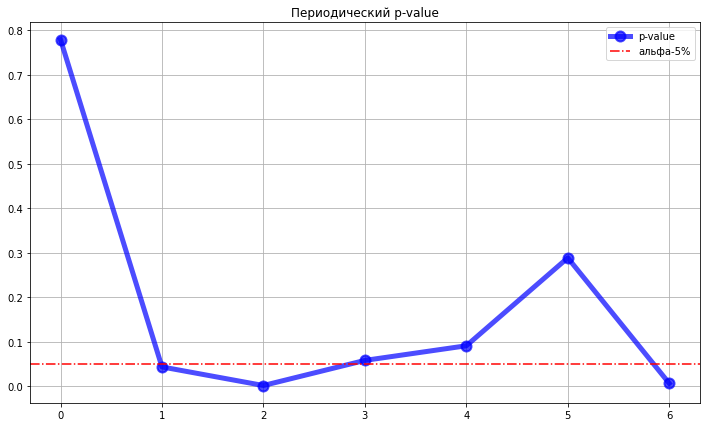

In [34]:
x = [0.77955054,0.04325171,0.0014449,0.05792262,0.09081471,0.28857159,0.00626745]
plt.figure(figsize=(12, 7))
plt.plot(x, 'o-b',label="p-value", lw=5,alpha=0.7, mec='b', mew=2,ms=10)
plt.axhline(y=0.05, color='r', linestyle='-.',label="альфа-5%")
plt.legend()
plt.grid(True)
plt.title("Периодический p-value")

Периодический p-value не дает однозначного ответа стоит ли отвергать H0 и принимать H1.

---


Со второго временного промежутка альтенативная гипотеза(H1) имеет стат.значимое подтверждение:предлагаемый владельцам Android промокод снижает отмены поездок. 

---

Имеется промежуток (c 3 по 5),когда H1 перестает иметь стат.значимое подтверждение, что требует отдельного изучения.






Фича №2

---
При уточнении, уверен ли юзер в отмене заказа не из центра, добавить эмодзи котика, просящего не отменять
Ожидаем: ниже отмены по заказам НЕ из центра


In [36]:
gett_df_out_center_order = gett_df[gett_df.city_center_order==0] #сформируем ГС из пользователей с ОС Android
gett_df_out_center_order.city_center_order.value_counts()

0    70842
Name: city_center_order, dtype: int64

In [37]:
gett_df_out_center_order.groups.value_counts()

Test       35442
Control    35400
Name: groups, dtype: int64

In [38]:
gett_df2_groupA = gett_df_out_center_order[gett_df_out_center_order.groups=='Control'] #отфильтруем groups==Control выборка А
gett_df2_groupB = gett_df_out_center_order[gett_df_out_center_order.groups=='Test'] #отфильтруем groups==Test выборка B
 # выбираем нужное количество строк, чтоб выборки А и В были одинаковыми 
gett_df2_groupB = gett_df2_groupB.iloc[0:35400]
gett_df2_groupA = gett_df2_groupA.iloc[0:35400]
print(gett_df2_groupA.groups.value_counts())
print(gett_df2_groupB.groups.value_counts())

Control    35400
Name: groups, dtype: int64
Test    35400
Name: groups, dtype: int64


In [39]:
#Разбиваем тестовую выборку на 7 равных частей
gett_df2_groupB1 = gett_df2_groupB.iloc[0:5057]
gett_df2_groupB2 = gett_df2_groupB.iloc[5057:10114]
gett_df2_groupB3 = gett_df2_groupB.iloc[10114:15171]
gett_df2_groupB4 = gett_df2_groupB.iloc[15171:20228]
gett_df2_groupB5 = gett_df2_groupB.iloc[20228:25285]
gett_df2_groupB6 = gett_df2_groupB.iloc[25285:30342]
gett_df2_groupB7 = gett_df2_groupB.iloc[30342:35400]
gett_df2_groupA1 = gett_df2_groupA.iloc[0:5057]
gett_df2_groupA2 = gett_df2_groupA.iloc[5057:10114]
gett_df2_groupA3 = gett_df2_groupA.iloc[10114:15171]
gett_df2_groupA4 = gett_df2_groupA.iloc[15171:20228]
gett_df2_groupA5 = gett_df2_groupA.iloc[20228:25285]
gett_df2_groupA6 = gett_df2_groupA.iloc[25285:30342]
gett_df2_groupA7 = gett_df2_groupA.iloc[30342:35400]

In [43]:
A1_1 = gett_df2_groupA1[['order_made']]  # контрольная выборка А с одним столбцом order_made
B1_1 = gett_df2_groupB1[['order_made']] # выборка B с одним столбцом order_made
t, p_value = stats.ttest_ind(A1_1, B1_1) #p_value и Критерий Стьюдента (t-test)
print(t, p_value)
print(stats.ttest_ind(A1_1, B1_1, equal_var = False))

[-1.5023675] [0.13303345]
Ttest_indResult(statistic=array([-1.5023675]), pvalue=array([0.13303345]))


In [44]:
A1_2 = gett_df2_groupA2[['order_made']] 
B1_2 = gett_df2_groupB2[['order_made']] 
t, p_value = stats.ttest_ind(A1_2, B1_2)
print(t, p_value)
print(stats.ttest_ind(A1_2, B1_2, equal_var = False))

[-2.32089144] [0.02031249]
Ttest_indResult(statistic=array([-2.32089144]), pvalue=array([0.02031249]))


In [50]:
A1_3 = gett_df2_groupA3[['order_made']] 
B1_3 = gett_df2_groupB3[['order_made']] 
t, p_value = stats.ttest_ind(A1_3, B1_3)
print(t, p_value)
print(stats.ttest_ind(A1_3, B1_3, equal_var = False))

[-1.18304897] [0.23681755]
Ttest_indResult(statistic=array([-1.18304897]), pvalue=array([0.23681755]))


In [46]:
A1_4 = gett_df2_groupA4[['order_made']] 
B1_4 = gett_df2_groupB4[['order_made']] 
t, p_value = stats.ttest_ind(A1_4, B1_4)
print(t, p_value)
print(stats.ttest_ind(A1_4, B1_4, equal_var = False))

[-1.7449088] [0.08103112]
Ttest_indResult(statistic=array([-1.7449088]), pvalue=array([0.08103112]))


In [47]:
A1_5 = gett_df2_groupA5[['order_made']] 
B1_5 = gett_df2_groupB5[['order_made']] 
t, p_value = stats.ttest_ind(A1_5, B1_5)
print(t, p_value)
print(stats.ttest_ind(A1_5, B1_5, equal_var = False))

[-1.19932348] [0.23043029]
Ttest_indResult(statistic=array([-1.19932348]), pvalue=array([0.23043029]))


In [48]:
A1_6 = gett_df2_groupA6[['order_made']] 
B1_6 = gett_df2_groupB6[['order_made']] 
t, p_value = stats.ttest_ind(A1_6, B1_6)
print(t, p_value)
print(stats.ttest_ind(A1_6, B1_6, equal_var = False))

[-1.91867105] [0.0550541]
Ttest_indResult(statistic=array([-1.91867105]), pvalue=array([0.0550541]))


In [49]:
A1_7 = gett_df2_groupA7[['order_made']] 
B1_7 = gett_df2_groupB7[['order_made']] 
t, p_value = stats.ttest_ind(A1_7, B1_7)
print(t, p_value)
print(stats.ttest_ind(A1_7, B1_7, equal_var = False))

[-2.92564592] [0.00344506]
Ttest_indResult(statistic=array([-2.92564592]), pvalue=array([0.00344506]))


Text(0.5, 1.0, 'Периодический p-value')

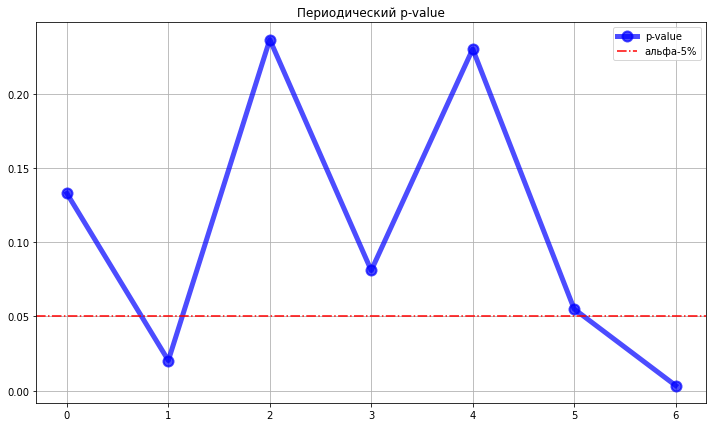

In [51]:
x = [0.13303345,0.02031249,0.23681755,0.08103112,0.23043029,0.0550541,0.00344506]
plt.figure(figsize=(12, 7))
plt.plot(x, 'o-b',label="p-value", lw=5,alpha=0.7, mec='b', mew=2,ms=10)
plt.axhline(y=0.05, color='r', linestyle='-.',label="альфа-5%")
plt.legend()
plt.grid(True)
plt.title("Периодический p-value")

Периодический p-value не дает однозначного ответа стоит ли отвергать H0 и принимать H1.

---

Со первого временного промежутка альтенативная гипотеза(H1) имеет стат.значимое подтверждение:добавление эмодзи котика, просящего не отменять поездку снижает отмены.
